<a href="https://colab.research.google.com/github/shobhit-saini/Convolution_Neural_Network/blob/master/Emotion_Detector_through_Image/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import h5py


Y =  0
Not Happy


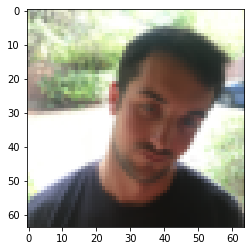

In [4]:
def load_dataset():
    #Train Set Dataset
    train_dataset = h5py.File('train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    #Test set Dataset
    test_dataset = h5py.File('test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])

    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig = load_dataset()
'''
Dims:
train_set_x_orig:(600, 64, 64, 3)
train_set_y_orig:(1, 600)
test_set_x_orig:(150, 64, 64, 3)
test_set_y_orig:(1, 150)
'''
plt.imshow(train_set_x_orig[0])
print("Y = ",train_set_y_orig[0][0])
if train_set_y_orig[0][0] == 0:
  print("Not Happy")
else:
  print("Happy")

In [0]:
'''
Dims:
train_X:(600, 64, 64, 3)
test_X:(150, 64, 64, 3)
train_Y:(600, 1)
test_Y:(150, 1)
'''
# Normalization
train_X = train_set_x_orig/255
test_X = test_set_x_orig/255

#Reshape the output
train_Y = train_set_y_orig.T
test_Y = test_set_y_orig.T

In [0]:
def model(Input_shape):
  X_input = Input(Input_shape)

  X = ZeroPadding2D((3,3))(X_input)

  X = Conv2D(32, (7,7), strides= (1,1), name = 'conv0')(X)
  X = BatchNormalization(axis = 3, name = 'bn0')(X)
  X = Activation('relu')(X)

  X = MaxPooling2D((2,2), name = 'MaxPool')(X)

  X = Flatten()(X)
  X = Dense(1, activation = 'sigmoid', name = 'fc')(X)

  model = Model(inputs = X_input, outputs = X, name = 'Happy_Model')
  return model


In [11]:
#Create a model
happyModel = model(train_X.shape[1:])

#Compile model
happyModel.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

#Train Model
happyModel.fit(x = train_X, y = train_Y, epochs = 40, batch_size = 32)

#Test Model
preds = happyModel.evaluate(x = test_X, y = test_Y)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Epoch 1/40
600/600 [==============================] - 0s 581us/step - loss: 0.8103 - accuracy: 0.7017
Epoch 2/40
600/600 [==============================] - 0s 242us/step - loss: 0.2425 - accuracy: 0.9000
Epoch 3/40
600/600 [==============================] - 0s 252us/step - loss: 0.1337 - accuracy: 0.9483
Epoch 4/40
600/600 [==============================] - 0s 265us/step - loss: 0.0924 - accuracy: 0.9750
Epoch 5/40
600/600 [==============================] - 0s 254us/step - loss: 0.0855 - accuracy: 0.9700
Epoch 6/40
600/600 [==============================] - 0s 262us/step - loss: 0.0745 - accuracy: 0.9783
Epoch 7/40
600/600 [==============================] - 0s 255us/step - loss: 0.0971 - accuracy: 0.9700
Epoch 8/40
600/600 [==============================] - 0s 263us/step - loss: 0.0715 - accuracy: 0.9783
Epoch 9/40
600/600 [==============================] - 0s 245us/step - loss: 0.0673 - accuracy: 0.9783
Epoch 10/40
600/600 [==============================] - 0s 262us/step - loss: 0.070

Model: "Happy_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 32768)             

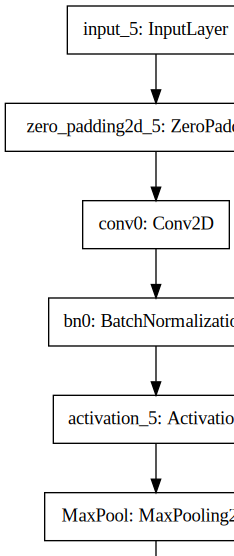

In [12]:
happyModel.summary()
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))